# Parallel Inductance Design

Main eqs from Annunziata paper:

(1)  $L_K= \frac {l}{w} \frac{R_{sq}h}{2\pi^2 \Delta} \frac{1}{\tanh{\frac{\Delta}{2k_BT}}}$  

(2) $\Delta = \Delta_{00} e^{\frac{-\pi\xi}{4}}$

(3) $\frac{I}{I_c}=1.897 e^{\frac{-3\pi\xi}{8}}\sqrt{\xi}(\frac{\pi}{2}-\frac{2}{3}\xi)$

(4) Area eq

(5) $f=\frac{1}{2\pi\sqrt{(L_m+L_k)C}}$


Please enter the number of inductors 50

Critical current for inductor # 0  is 60.0 uA

Critical current for inductor # 1  is 72.60000000000001 uA

Critical current for inductor # 2  is 86.40000000000002 uA

Critical current for inductor # 3  is 101.39999999999999 uA

Critical current for inductor # 4  is 117.60000000000001 uA

Critical current for inductor # 5  is 135.00000000000003 uA

Critical current for inductor # 6  is 153.60000000000002 uA

Critical current for inductor # 7  is 173.4 uA

Critical current for inductor # 8  is 194.40000000000006 uA

Critical current for inductor # 9  is 216.60000000000002 uA

Critical current for inductor # 10  is 240.0 uA

Critical current for inductor # 11  is 264.6 uA

Critical current for inductor # 12  is 290.40000000000003 uA

Critical current for inductor # 13  is 317.40000000000003 uA

Critical current for inductor # 14  is 345.6000000000001 uA

Critical current for inductor # 15  is 375.0000000000001 uA

Critical current for inductor # 16

Text(0, 0.5, '\\delta f in MHz')

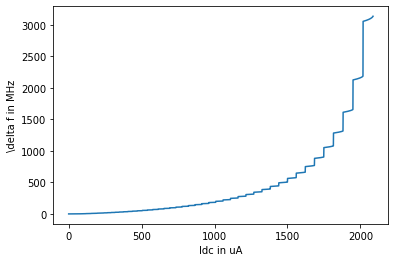

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import math

#Problem Parameters
m = 9.1093e-31  ## electron mass
e = 1.60217e-17 ## electron charge
l=100e-6 ## length of the nanowire                           (Assumption)           
Jc=6e10 ## Critical current density from literature (A/m^2)  (Assumption)
Tc=11 ## Critical Temperature From literature
T=2e-3 ##operating temperature
Kb=1.38e-23 ##Boltzman Constant
del00= 1.76*Kb*Tc ##Energy Gap at zero temp and zero bias current
ro=200e-8 ## resistivity of NbTiN from literature             (Assumption)
h=6.626e-34 ##Plank's Constant
Lm=300e-12 ##Geometric Inductance                             (Assumption)
C=1.7e-12 ##Resonator Capacitance                             (Assumption)
n=0 #Counter
arr=[]; #Array to store Bias Current Values
fnew=[]; #Array to store the resulting resonance frequency
delf=[]; #Array to store the different values of change of frequency 


## Writing the main equations in form of functions
def eq5(f):     
    return [f[0]-(1/(math.sqrt((Lm+Lk)*C)))] ##eq5

def eq4(x):
    return [l*N*r*2+l*sum(w)-2*(x[0]**2)+sum(w)*x[0]-2*r*x[0]] ##eq4    

def getLk(width,thickness):
    
    def eq3(xi):
        return [I/Ic-(1.897*(math.exp(-3*np.pi*xi[0]/8))*math.sqrt(xi[0])*(np.pi/2-2*xi[0]/3))] ##eq3

    Ic=width*thickness*Jc ## Critical current
    xi = fsolve(eq3,[0]) ##eq3
    delta=del00*math.exp(-np.pi*xi/4)##eq2
    Lk=(l/(width*thickness))*(ro*h)/(2*(np.pi**2)*delta*math.tanh(delta/(2*Kb*T)))##eq1 
    return [Lk]  


###Design Parameters
N= int(input('Please enter the number of inductors ')) #number of inductances
w=[] #width
t=[] #thickness
Ic=[] #critical current
Lk0=[] #kinetic inductance @ 0 bias current for different inductors

for i in range (0, N): 
    w.append((100+i*10)*1e-9)
    t.append((10+i*1)*1e-9)
    Ic.append(w[i]*t[i]*Jc)
    print ("\nCritical current for inductor #",i," is", Ic[i]*1e6, "uA")
    
    #calculation of Lk0 
    I=0
    Lk0.append(getLk(w[i],t[i])[0])

Lk0_eq=0    

for element in Lk0:
    if element==0:
        continue
    Lk0_eq= Lk0_eq+element**-1
Lk0_eq=Lk0_eq**-1    
print ("\nLk0_eq is equal to", Lk0_eq*1e9, "nH")

f0=1/(2*np.pi*math.sqrt((Lm+Lk0_eq)*C))
print('\nf0 is equal to', f0*1e-9, 'GHz')

#Our Main variables
fin=int(input('\nEnter the operating freq in GHz ')) #Input Frequency
fin=fin*1e9


for I in range (0,int(max(Ic)*1e6)): 
    arr.append(I)
    I=I*1e-6

    RL=[]
    XL=[]
    RL_eq=0
    Lk_eq=0
    XL_eq=0
    Lk=[] #Kinetic Inductance @ different Bias Current

    
    for i in range (0,N):
        if I<Ic[i]:
            Lk.append(getLk(w[i],t[i]) [0])
#             print ("Lk",i," is equal to", Lk[i]*1e9, "nH")   
        else:
            Lk.append(0)
#             print ("no contribution")


    for element in Lk:
        if element!=0:
            Lk_eq= Lk_eq+element**-1
    if Lk_eq!=0:
        Lk_eq=Lk_eq**-1     
    
    
    
    for i in range (0,N):
        if Lk[i]==0:
            RL.append((ro*l)/(w[i]*t[i]))
        else:
            RL.append(0) 
            
    for element in RL:
        if element!=0:
            RL_eq=RL_eq +element**-1
    if RL_eq!=0:        
        RL_eq=RL_eq**-1  
    
    
        
#     print ("\nLk_eq is equal to", Lk_eq*1e9, "nH")    
#     print('Overall Resistence is equal to', RL_eq, ' ohm')


#         #Calculating the overall impedence impedence
    for i in range (0,N):
        if Lk[i]==0:
            XL.append(2*np.pi*fin*Lk0[i]) #Impedence
        else:            
            XL.append(2*np.pi*fin*Lk[i])  #Impedence
    
    for element in XL:
        if element!=0:
            XL_eq=XL_eq +element**-1
    if XL_eq!=0:
        XL_eq=XL_eq**-1    
#    print('Overall Impedence is equal to', X_L, ' ohm')



    #Change in Frequency
    fnew.append(1/(2*np.pi*math.sqrt((Lm+Lk_eq)*C)))   
    delf.append(np.abs(fnew[n]-f0))
#     print('K')
    n=n+1;

print('\nXL_eq is equal to',XL_eq, 'ohm')    
print('\nRL_eq is equal to',RL_eq, 'ohm')    

fnew = [element * 1e-9 for element in fnew]
delf = [element * 1e-6 for element in delf]

#Calculating Area
r=2*w[0]   ##the minimum spacing before we have a parasitic capacitance
x=fsolve(eq4,[1]) ##
print ("\nSo the effective area should be",x*1e6, "um x",x*1e6, "um")  

plt.plot(arr,delf )        
plt.xlabel("Idc in uA")
plt.ylabel("\delta f in MHz")